<a href="https://colab.research.google.com/github/nkmah2/Deep-Learning/blob/master/Data_Interpolation_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# DL      
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Number operations
import numpy as np
import scipy.stats as stats
# Data management
import pandas as pd
# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

import copy

In [52]:
# Import wine data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')

In [53]:
data.shape

(1599, 12)

In [54]:
data = data.replace('?',np.nan).dropna()
print(data.shape)

(1599, 12)


In [55]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


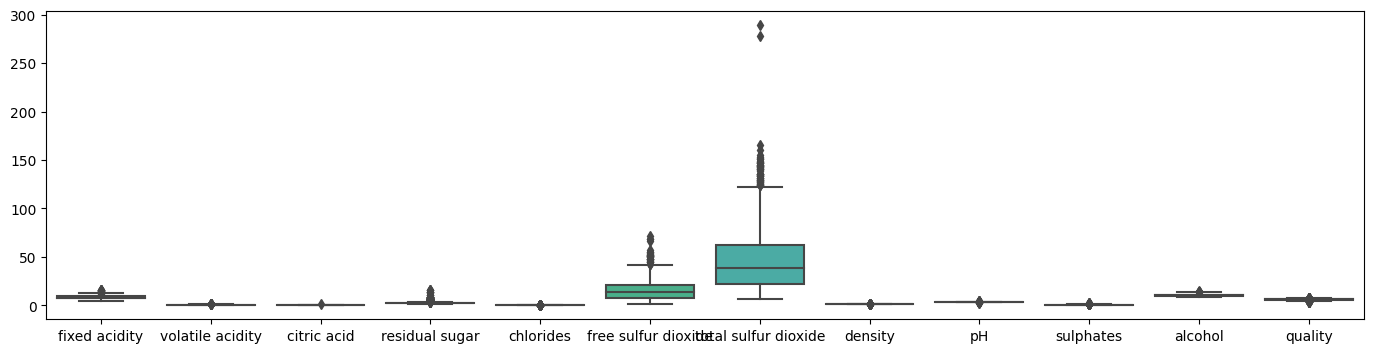

In [56]:
fig, ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [57]:
# Z score all the data
myColsNames = data.keys()
for n in myColsNames:
  colData = pd.to_numeric(data[n])
  data[n] = (colData - np.mean(colData)) / np.std(colData)

In [58]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16,8.887339e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


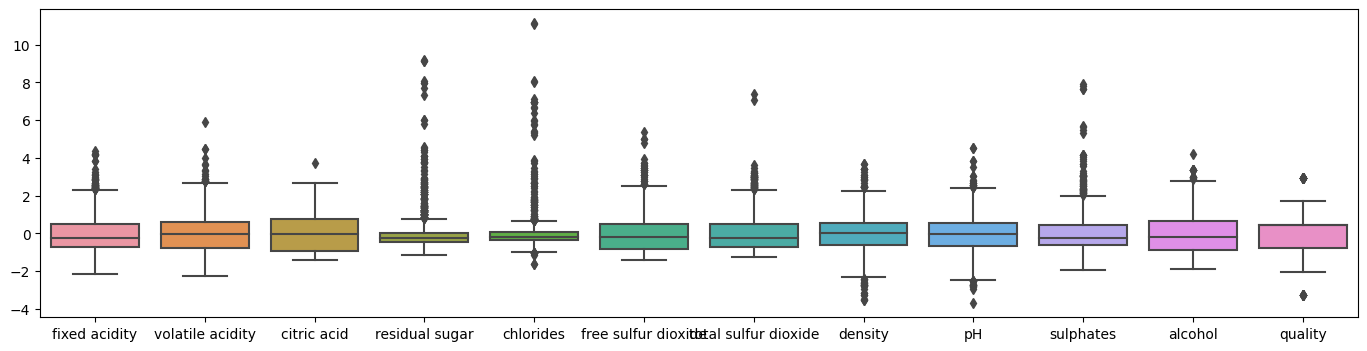

In [59]:
fig, ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [60]:
data_original = copy.deepcopy(data)

In [61]:
# Residual Suger is the one we will try to predict via interpolation using DL

n = 10

nanVals = np.random.choice(range(len(data)),size=n,replace=False)
data['residual sugar'][nanVals] = np.nan 
notNanVals = np.where(~data['residual sugar'].isna())[0] 



In [62]:
myColsNames = data.keys()
updatedColNames =myColsNames.drop(['residual sugar'])

trainDataT = torch.tensor(data[updatedColNames].values).float()
trainDataT = trainDataT[notNanVals,:]
trainlabelT = torch.tensor(data['residual sugar'].values).float()
trainlabelT = trainlabelT[notNanVals,None] # None to transform to matrix

testDataT = torch.tensor(data_original[updatedColNames].values).float()
testDataT = testDataT[nanVals,:]
testlabelT = torch.tensor(data_original['residual sugar'].values).float()
testlabelT = testlabelT[nanVals,None] # None to transform to matrix

print(f'Train Data {trainDataT.shape} \n')
print(f'Train Labels {trainlabelT.shape} \n')
print(f'Test Labels {testlabelT.shape} \n')
print(f'Test Data {testDataT.shape} \n')

Train Data torch.Size([1589, 11]) 

Train Labels torch.Size([1589, 1]) 

Test Labels torch.Size([10, 1]) 

Test Data torch.Size([10, 11]) 



In [63]:
train_data = TensorDataset(trainDataT,trainlabelT)
batchSize = 16
train_loader = DataLoader(train_data,batch_size=batchSize,shuffle=True,drop_last=True)

In [64]:
# The DL section

class WineNN(nn.Module):
  def __init__(self):
    super().__init__()

    # input layer
    self.input = nn.Linear(11,16)

    # hidden layer
    self.fc1 = nn.Linear(16,32)
    self.fc2 = nn.Linear(32,16)

    #outout
    self.output = nn.Linear(16,1)

  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.output(x)

      
     

In [65]:
# Test the model using some data from the training set
# test the model on a bit of data
testNet = WineNN()

X,y = next(iter(train_loader))
y_hat = testNet(X)
print(y_hat) 

#Compute Loss
lossFun = nn.MSELoss()
lossFun(y,y_hat)

tensor([[0.1839],
        [0.1652],
        [0.1921],
        [0.1636],
        [0.1804],
        [0.1955],
        [0.1699],
        [0.1718],
        [0.1923],
        [0.1916],
        [0.1925],
        [0.1850],
        [0.1619],
        [0.1827],
        [0.2067],
        [0.1800]], grad_fn=<AddmmBackward0>)


tensor(1.4240, grad_fn=<MseLossBackward0>)

In [66]:
# start with a fresh network
net = WineNN()
optimizer = torch.optim.Adam(net.parameters(),lr=.001)
lossfun = nn.MSELoss() 

# number of training epochs
numepochs = 300


# initialize losses and accuracies
trainLoss = torch.zeros(numepochs)


# loop over epochs
for epochi in range(numepochs):

  # loop over training data batches
  batchLoss = []
  for X,y in train_loader:

    # forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,y)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss from this batch
    batchLoss.append(loss.item())
    
  # end of batch loop...

  # get average losses across the batches
  trainLoss[epochi] = np.mean(batchLoss)


In [67]:
# Make predictions
yHatTrain = net(trainDataT)
yHatTest = net(testDataT)

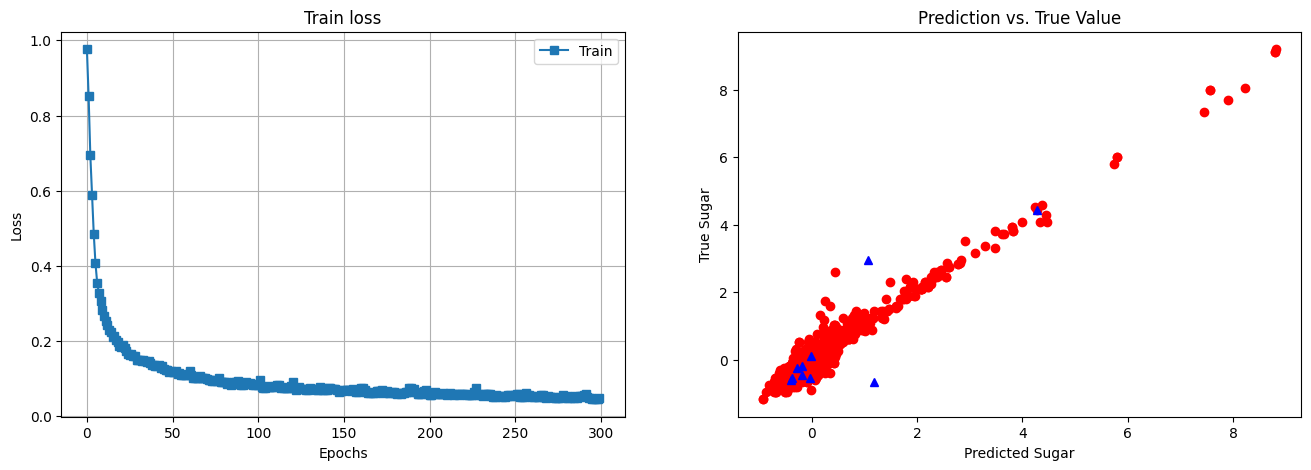

Corrlation coeff 0.9775166604843529 

Corrlation coeff 0.8622934567325786 



In [68]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(trainLoss,'s-',label='Train')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Train loss')
ax[0].legend()
ax[0].grid()



ax[1].plot(yHatTrain.detach().T,trainlabelT.T,'ro')
ax[1].plot(yHatTest.detach().T,testlabelT.T,'b^')
ax[1].set_xlabel('Predicted Sugar')
ax[1].set_ylabel('True Sugar')
ax[1].set_title('Prediction vs. True Value')

plt.show()

# Correlation between prediction on Train Dataset vs. Test Dataset
corrTrain = np.corrcoef(yHatTrain.detach().T,trainlabelT.T)[1,0]
corrTest = np.corrcoef(yHatTest.detach().T,testlabelT.T)[1,0]

print(f'Corrlation coeff {corrTrain} \n')
print(f'Corrlation coeff {corrTest} \n')




In [69]:
# References:
#TEACHER: Mike X Cohen, sincxpress.com
#COURSE URL: udemy.com/course/deeplearning_x/